# BREIF  DESCRIPTION OF THIS NOTEBOOK

* This notebook mainly consists of the following steps
> 1. Basic operations for simple understanding of data.
> 2. EDA for better understanding of data.
> 3. Outliers detection.
> 4. Feature selection.
> 5. Model building and Training.

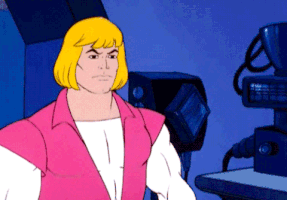
## 1. BASIC OPERATIONS 

In [ ]:
# import all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# reading data from "Twitch_user_data.csv" file

data = pd.read_csv("../input/twitch-users-dataset/Twitch_user_data.csv")

In [ ]:
# top 20 records of data

data.head(20)

In [ ]:
# bottom 20 records of data

data.tail(20)


* As the first record index starts from 0 we will be having 999 as the last record index

In [ ]:
# Shape of DataFrame

data.shape

In [ ]:
# total number of records in the dataset

print("There are totally {} records in our dataset".format(data.index.stop))

In [ ]:
# all column names

data.columns

## 2. EDA FOR BETTER UNDERSTANDING OF DATA

In [ ]:
# let's see all the column types before performing any visualization

data.dtypes

In [ ]:
# finding any nulll values present in our data

data.isnull().sum()

<h6> There are no missing values to handle</h6>

In [ ]:
# more info about data

data.info()

In [ ]:
# a breif idea about the data with the help of describe method

data.describe()

In [ ]:
# finding correlation between features

data.corr()

### FORMATTING THE CHANNEL NAMES
* #### If we had observed in detail there are some weird names to some of the channels, so let's fix that now.

In [ ]:
# Sample channel name that's looking differently.

data.iloc[17,0]

<h6> So in order to remove that non alphabet letters and to exctarct the exact channel name, I am gonna use regex </h6> 

In [ ]:
# exctracting Channel name

import re 

original_chan_names = data["Channel"]
modified_chan_names = []

# regex pattern to exctract Channel names
pattern = "\([a-zA-Z0-9]+\_*[a-zA-Z0-9]*\)"


for i in data["Channel"]:
    if "(" in i:
        val = re.findall(pattern,i)[0]
        modified_chan_names.append(val)
    else:
        modified_chan_names.append(i)
        
# 18th record channel name

modified_chan_names[17]

In [ ]:
# removing "(" ")" from extracted movie names

modified_chan_names = [i.strip("()") for i in modified_chan_names]


# Now let's see the 18th record Channel name 
modified_chan_names[17]


In [ ]:
# replacing the Original channel names with modified Channel names

data["Channel"]=modified_chan_names

## Channel names which are top in each categories ( Watch time , followers and etc)

In [ ]:
# finding the channel names which are top in each category

for column in data.columns[1:-3]:
    chan_name = data[data[column]==max(data[column])]["Channel"].values
    print("{} is top in {}".format(chan_name[0],column))
    print()

In [ ]:
data.head()

# VISUALIZATIONS

## A) Simple heatmap showing the correlation between different features

In [ ]:
# setting the figure size
fig = plt.figure(figsize=(10,8))

cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(data.corr(),annot=True,cmap=cmap)
plt.title("Heatmap Showing Correlations")
plt.show()

* Followers and Watch time(Minutes) are having high positive correlations, i.e When Followers increases then the Watch time(Minutes) also increases.

* Average Viewers and Stream time(Minutes) are having high negative correlation i.e when one feature increases another feature decreases. 

## B) Pair Plot showing Correlations with the help scatter plot

In [ ]:
# pair plot showing relationship among different features (Bivariate analysis)

samp_data = data[['Watch time(Minutes)', 'Stream time(minutes)',
       'Peak viewers', 'Average viewers', 'Followers', 'Followers gained',
       'Views gained']]


sns.pairplot(samp_data,kind="scatter")
plt.show()

## C) Swarm plot Showing relationship between Watch time and Language

In [ ]:
fig = plt.figure(figsize=(10,5))

sns.swarmplot(data["Language"],data["Watch time(Minutes)"])
plt.xticks(rotation=90)
plt.show()

* The English Languae channels are having high watch time compared to other language channels.
* There are some other languages like Greek, Slovak, Finnish, Swedish and etc are having very less Watch time(Minutes) and also the no of channels using these languages are also less in count.

##  D) Scatter plot showing relation between Followers and Watch time(Minutes)

In [ ]:
# simple scatter plot showing relationship between Watch time(Minutes) and Followers

sns.jointplot(data["Followers"],data["Watch time(Minutes)"],kind="scatter",color="r")
plt.show()

In [ ]:
# Counting Matured content channels  and child content channel

Mature_content_chans = data[data["Mature"]==True]["Channel"].values

Child_content_chans = data[data["Mature"]==False]["Channel"].values

print("There are {} Matured  content channels".format(len(Mature_content_chans)))
print("There are {} Non Matured content channels".format(len(Child_content_chans)))

## E) Bar plots showing the count of Mature content channels and Count of partnered Channels

In [ ]:
# Counter plot showing no of Matured content channels 

fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Count of Mature Content Channels")
sns.countplot(data["Mature"])
plt.plot([],[],color="b",label="False")
plt.plot([],[],color="orange",label="True")
plt.legend()



# Counter plot showing No of Partnered Channels

plt.subplot(1,2,2)
plt.title("Coun of Partnered Channels")
sns.countplot(data["Partnered"])
plt.plot([],[],color="b",label=False)
plt.plot([],[],color="orange",label=True)
plt.legend()
plt.show()

## F) Top 5 mostly languages.

In [ ]:
# Top 5 mostly used languages

from collections import Counter

samp_dict = Counter(data["Language"])
top_5_lang = samp_dict.most_common(5)
top_5_lang = dict(top_5_lang)
samp_dict = dict(samp_dict)

fig = plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.pie(top_5_lang.values(),labels=['English', 'Korean', 'Russian', 'Spanish', 'French'],startangle=90)
plt.title("Top 5 Mostly used Languages")
plt.show()

In [ ]:
# bar plot showing count of all languages

fig = plt.figure(figsize=(10,5))
plt.bar(samp_dict.keys(),samp_dict.values(),color="r")
plt.xticks(rotation=90)
plt.show()

## F) Top 10 channels Details based on their followers

In [ ]:
data.head()

In [ ]:
top_10 = sorted(data["Followers"])[-10:]

top_10_chan_names = []
top_10_chan_follows = []
top_10_chan_watch = []
top_10_chan_stream = []
top_10_chan_avg = []


for i,row in data.iterrows():
    if row["Followers"] in top_10:
        top_10_chan_names.append(row["Channel"])
        top_10_chan_follows.append(row["Followers"])
        top_10_chan_watch.append(row["Watch time(Minutes)"])
        top_10_chan_stream.append(row["Stream time(minutes)"])
        top_10_chan_avg.append(row["Average viewers"])


<h6> Followers of Top 10 channels </h6>

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.bar(top_10_chan_names,top_10_chan_follows,color="#1affa3",width=0.5)
plt.title("Bar plot showing Followers of Top 10 Channels")
plt.xticks(rotation=45)
plt.show()

<h6> Watch time of top 10 channels </h6>

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.bar(top_10_chan_names,top_10_chan_watch,color="#4da6ff",width=0.5)
plt.title("Bar plot showing Watch time(Minutes) of Top 10 Channels")
plt.xticks(rotation=45)
plt.show()

<h6> Stream time of Top 10 Channels </h6>

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.bar(top_10_chan_names,top_10_chan_stream,color="#66ff33",width=0.5)
plt.title("Bar plot showing Stream time(Minutes) of Top 10 Channels")
plt.xticks(rotation=45)
plt.show()

<h6> Average viewers of Top 10 channels

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.bar(top_10_chan_names,top_10_chan_avg,color="#ffff1a",width=0.5)
plt.title("Bar plot showing Average viewers of Top 10 Channels")
plt.xticks(rotation=45)
plt.show()

# 3. OUTLIERS DETECTION

* An outlier is a point or a set of data points which lies away from the rest of the values in the dataset.
* Problems with outliers
> 1. Affects the standard deviation of data.
> 2. Manipulates the overall mean of the data.
> 3. Converts the data into skewed form.
> 4. It causes bias in the accuracy estimation of a ML model.
> 5. Affects the distribution and statistics of dataset.

* Different methods to detect outliers
> 1. Z-Score
> 2. Scatter plots
> 3. IQR (Inter Quartile Range)

In this particular notebook i will be using IQR to find the outliers and will be using boxplots for detecting the outliers visually.

In [ ]:
data.head()

In [ ]:
# sample viz showing the outliers present in followers column
sns.boxplot(data["Followers"])

#### Before removing outliers let's convert all the categorical data into numerical data.
> Mature, Partnered, Language are the only columns having categorical data.

In [ ]:
# data types before binarization 

data[["Mature","Partnered","Language"]].dtypes

In [ ]:
# lambda function for Mature and Partnered
x = lambda a : 1 if a==True else 0

Mature = data["Mature"].apply(x)
Partnered = data["Partnered"].apply(x)

# creating a new column with modified numerical values
data["Mod_Mature"]=Mature
data["Mod_Partnered"]=Partnered

In [ ]:
data["Mod_Mature"].head()

In [ ]:
data["Mod_Partnered"].head()

##### Now let's convert the language column ( Categorical column ) into numerical data column. So for this process i am going to rank the languages based on their Channels count.

In [ ]:
val_dict = data["Language"].value_counts()

> There are so  many number of Languages for binarization or to assign integer values, so to improve efficieny combine all the languages which is used by less than 20 channels.

In [ ]:
lang_dict = {"English":1,"Korean":2,"Russian":3,"Spanish":4,"French":5,"Portuguese":6,"German":7,"Chinese":8,"Turkish":9,"Other":10}

samp_numeric = []

for i in data["Language"]:
    if val_dict[i]>20:
        samp_numeric.append(samp_dict[i])
    else:
        samp_numeric.append(samp_dict["Other"])

        
# sample top 10 values 
samp_numeric[:10]

In [ ]:
# adding new column with modified values for language colum
data["Mod_Lang"] = samp_numeric

## Outliers removing

In [ ]:
def remove(df,col,outlier):
    q1,q2=np.percentile(col,[25,75])
    iqr = q2-q1
    lb = q1 - 1.5*iqr
    ub = q2 + 1.5*iqr
    for i in range(len(col)):
        if(col[i]>ub or col[i]<lb):
            if df.index[i] not in outlier:
                outlier.append(df.index[i])
                
# creating sample dataframe without categorical data

samp_data= data.drop(["Channel","Mature","Partnered","Language"],axis=1)
samp_data.head()

In [ ]:
# applying the above function to the whole data

outliers = []
for i in samp_data:
    remove(samp_data,samp_data[i],outliers)

In [ ]:
# dropping outliers from the datset
mod_data = data.drop(outliers,axis=0)

## 4. FEATURE SELECTION

* Feature selection is the process of selecting the features which are important for model training and removing the unwanted features.

In [ ]:
new_data = mod_data.drop(["Mature","Channel","Partnered","Language"],axis=1)

In [ ]:
new_data.head()

In [ ]:
# Followers column will be target feature, so let's separte it now

target_data = new_data["Followers"]

## 5. Model Creation and Training

In [ ]:
# importng necessary libraries 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [ ]:
# splitting the train and test data

x_train,y_train,x_test,y_test = train_test_split(new_data.drop("Followers",axis=1),target_data,test_size=0.25)

In [ ]:
# sample view of data after splitting

print("Shape of x_train:",x_train.shape)
print("Shape of x_test:",x_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)

In [ ]:
# Creating an object for linear regression model

linear_mod = LinearRegression()
linear_mod.fit(x_train,x_test)

In [ ]:
# predicting values for y_train

y_pred = linear_mod.predict(y_train)

In [ ]:
y_pred

In [ ]:
# Model Evalution

In [ ]:

linear_mod.intercept_

In [ ]:
linear_mod.coef_

In [ ]:
r2_score(y_test,y_pred)

* The main aim of this notebook is EDA we aren't much bothered about the model and efficiency.
* We can also other metrices like mean absolutre error or mean squared error and etc

# <CENTER>THANK YOU :)</CENTER>

## HAPPY TO SEE ANY SUGGESTIONS TO IMPROVE THIS NOTEBOOK

# <CENTER> DO SUPPORT BY UPVOTING</CENTER>